In [13]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

beer_df = pd.read_csv('/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/analysis/feature_list_11_Dec_2022_10_24_35.csv')
beer_df

,Aspect Ratio,Hu_0,Hu_1,Hu_2,Cap_Hu_0,Cap_Hu_1,Cap_Hu_2,Label
0,0.242016,2.544690,5.229862,10.656383,2.855350,7.510926,11.879586,closed_seal_broken
1,0.259094,2.588254,5.331348,11.053955,2.872606,8.134204,11.650747,closed_seal_broken
2,0.256643,2.578780,5.305815,11.000265,2.878415,7.964904,11.197888,closed_seal_broken
3,0.244006,2.447083,5.017189,9.432860,2.808987,7.813707,11.600920,closed_seal_broken
4,0.247899,2.571611,5.292674,10.264553,2.881628,7.683156,11.817603,closed_seal_broken
...,...,...,...,...,...,...,...,...
1088,0.258876,2.478917,5.096303,10.578945,2.813498,8.798345,11.044336,open_broken
1089,0.353867,2.516293,5.315098,8.692402,2.791022,6.493664,9.772688,open_broken
1090,0.280761,2.604007,5.385927,9.870159,2.980610,8.451354,11.982890,open_broken
1091,0.254974,2.341660,4.817292,10.147991,2.725698,7.555455,11.657861,open_broken


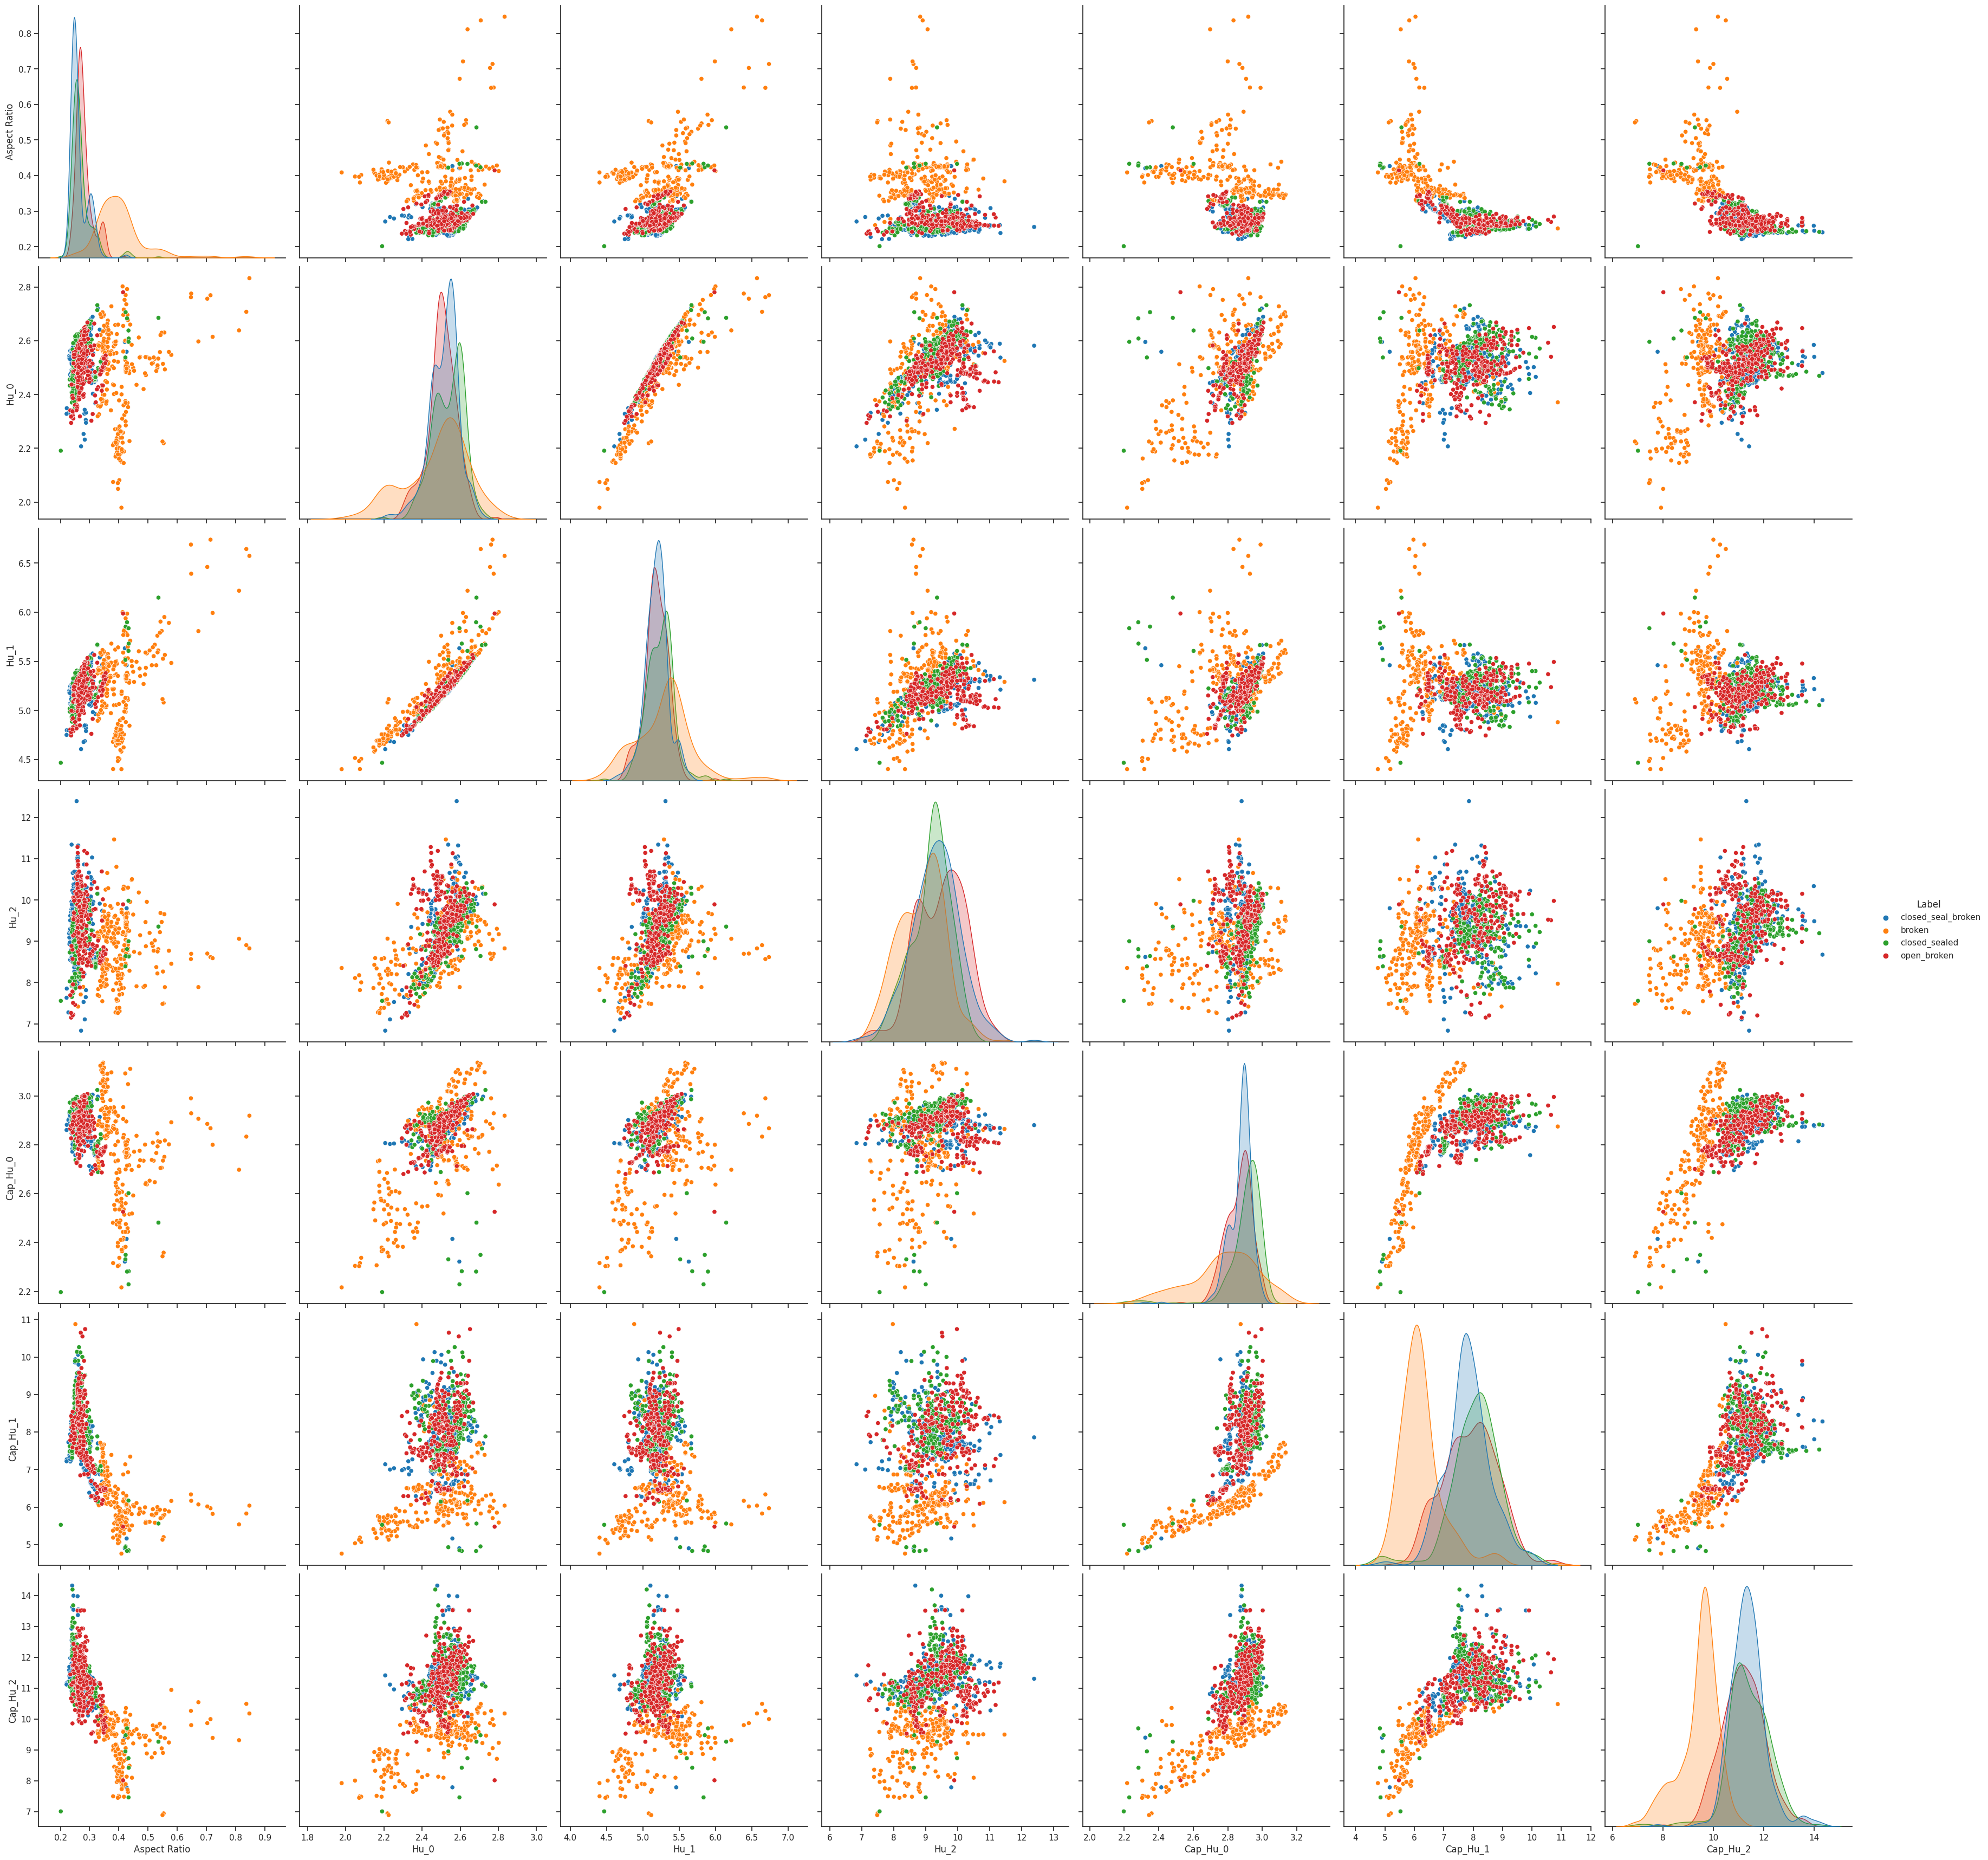

In [14]:
#data.plot.scatter(x='hu0',y='label')

sns.set_theme(style="ticks")
plot = sns.pairplot(beer_df, hue ="Label",palette="tab10", height= 5)


In [2]:
# Teilen des Datensatzes in Features und Labels. Hierfür kann die Funktion iloc der Bibliothek Pandas verwendet werden. 

# alles außer die letzte Spalte
#TODO 
data = beer_df.iloc[:,:-1]
#data
# nur die letzte Spalte  
#TODO 
label = beer_df.iloc[:,-1]
label


0            Broken
1            Broken
2            Broken
3            Broken
4            Broken
           ...     
1195    Open_Broken
1196    Open_Broken
1197    Open_Broken
1198    Open_Broken
1199    Open_Broken
Name: Label, Length: 1200, dtype: object

In [4]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=3)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)

In [10]:
# aufteilen des Datensatzes in Train- und Testdaten
from sklearn.model_selection import train_test_split

# aufteilen des Datenstatzes unter verwendung der funktion train_test_split
# TODO 
data_train, data_test, label_train, label_test = train_test_split(data_pca,label, test_size=0.2,
                                                   random_state=42)

print('data_train: ',data_train.shape, 'label_train: ', data_train.shape)
print('data_test: ', data_test.shape, 'label_test: ', data_test.shape)

data_train:  (960, 2) label_train:  (960, 2)
data_test:  (240, 2) label_test:  (240, 2)


In [11]:
# Initalisieren des Klassifikators
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()# Instazieren des Klassifikators 

# trainieren des Klassifikators mit den Trainingsdaten
#TODO # Wende Klassifikator auf Trainingsdaten an
bayes_clf.fit(data_train,label_train);


In [12]:
# importieren der benötigten Bibliotheken 
from sklearn.metrics import confusion_matrix, classification_report

# Schnelles ausgeben der Accuracy des Klassifikators mit der Funktion .score
# TODO
print("Score ist:" ,bayes_clf.score(data_test, label_test))

#***************************************************************
# Ausgeben der Konfusions Matrix 
# Vorhersagen der Klassen mit dem Testdatensatz mit .predict
# TODO  
y_pred_test = bayes_clf.predict(data_test) #wende Modell (Bayes) auf testdaten an, werden klassifiziert
#Ausgeben einer Konfusionsmatrix mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO
print(confusion_matrix(label_test,y_pred_test)) #vergleiche testdaten mit vorhergesagten Daten

#***************************************************************
# Ausgeben des Classifikation Reports mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO 

print(classification_report(y_pred_test,label_test))

Score ist: 0.6208333333333333
[[60  1  0  1]
 [ 3 21 22 14]
 [ 0  6 44 10]
 [ 3  6 25 24]]
                    precision    recall  f1-score   support

            Broken       0.97      0.91      0.94        66
Closed_Seal_Broken       0.35      0.62      0.45        34
     Closed_Sealed       0.73      0.48      0.58        91
       Open_Broken       0.41      0.49      0.45        49

          accuracy                           0.62       240
         macro avg       0.62      0.63      0.60       240
      weighted avg       0.68      0.62      0.63       240



In [8]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=2)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)

In [9]:
import matplotlib.pyplot as plt 


for lab, mark, col in zip(range(4),( '*','s','o'),('green','red','blue','yellow')):
    plt.scatter(x=data_pca[:,0].real[label==lab],
    y=data[:,1].real[label==lab],
    color = col)
plt.title('Orginal-Beer-Daten')
plt.xlabel('Sepal-Länge (cm)')
plt.ylabel('Sepal-Breite (cm)')

InvalidIndexError: (slice(None, None, None), 1)